<a href="https://colab.research.google.com/github/ixd-ai-hub/Research-Ground/blob/feature%2FCU-865d7mpad-sticker-generation-models/mlops/SD_img2img_endpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sagemaker boto3 --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 10.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.27.135 requires PyYAML<5.5,>=3.10, but you have pyyaml 6.0 which is incompatible.


In [ ]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.156.0 requires PyYAML==6.0, but you have pyyaml 5.4.1 which is incompatible.


AWS Access Key ID [None]: 
AWS Secret Access Key [None]: +v
Default region name [None]: 
Default output format [None]:

In [ ]:
!aws configure set default.region us-west-1
!aws configure set aws_access_key_id ''
!aws configure set aws_secret_access_key ''

In [ ]:
import sagemaker, boto3, json
import matplotlib.pyplot as plt
import numpy as np
import base64
# import torch
from io import BytesIO
from PIL import Image

In [ ]:
sm_client = boto3.client('sagemaker-runtime', region_name='us-west-1')

In [ ]:
def display_img_and_prompt(img, prmpt):
    """Display hallucinated image."""
    plt.figure(figsize=(12, 12))
    plt.imshow(np.array(img))
    plt.axis("off")
    plt.title(prmpt)
    plt.show()

In [ ]:
edge_img_path = '/content/edge_image.png'
image = Image.open(edge_img_path).convert("RGB")
buffered = BytesIO()
image.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode()

In [ ]:
def predict(payload):
    endpoint_name = 'huggingface-pytorch-inference-2023-05-18-16-31-44-989'
    # payload = {
    #     'prompt': prompt
    # }
    response = sm_client.invoke_endpoint(
        EndpointName=endpoint_name,
        Body=json.dumps(payload),
        ContentType='application/json'
    )
    result = json.loads(response['Body'].read().decode())
    return result

In [ ]:
payload = {
    'inputs': "little witch girl, purple dress, blue hat",
    'image': img_str,
    "num_images_per_prompt" : 3
}
# query_response = query(model_predictor, text)
res = predict(payload)
# display_img_and_prompt(img, prmpt)

In [ ]:
res.keys()

dict_keys(['generated_images'])

In [ ]:
def decode_base64_image(image_string):
  base64_image = base64.b64decode(image_string)
  buffer = BytesIO(base64_image)
  return Image.open(buffer)

def display_images(images=None,columns=3, width=100, height=100):
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.axis('off')
        plt.imshow(image)

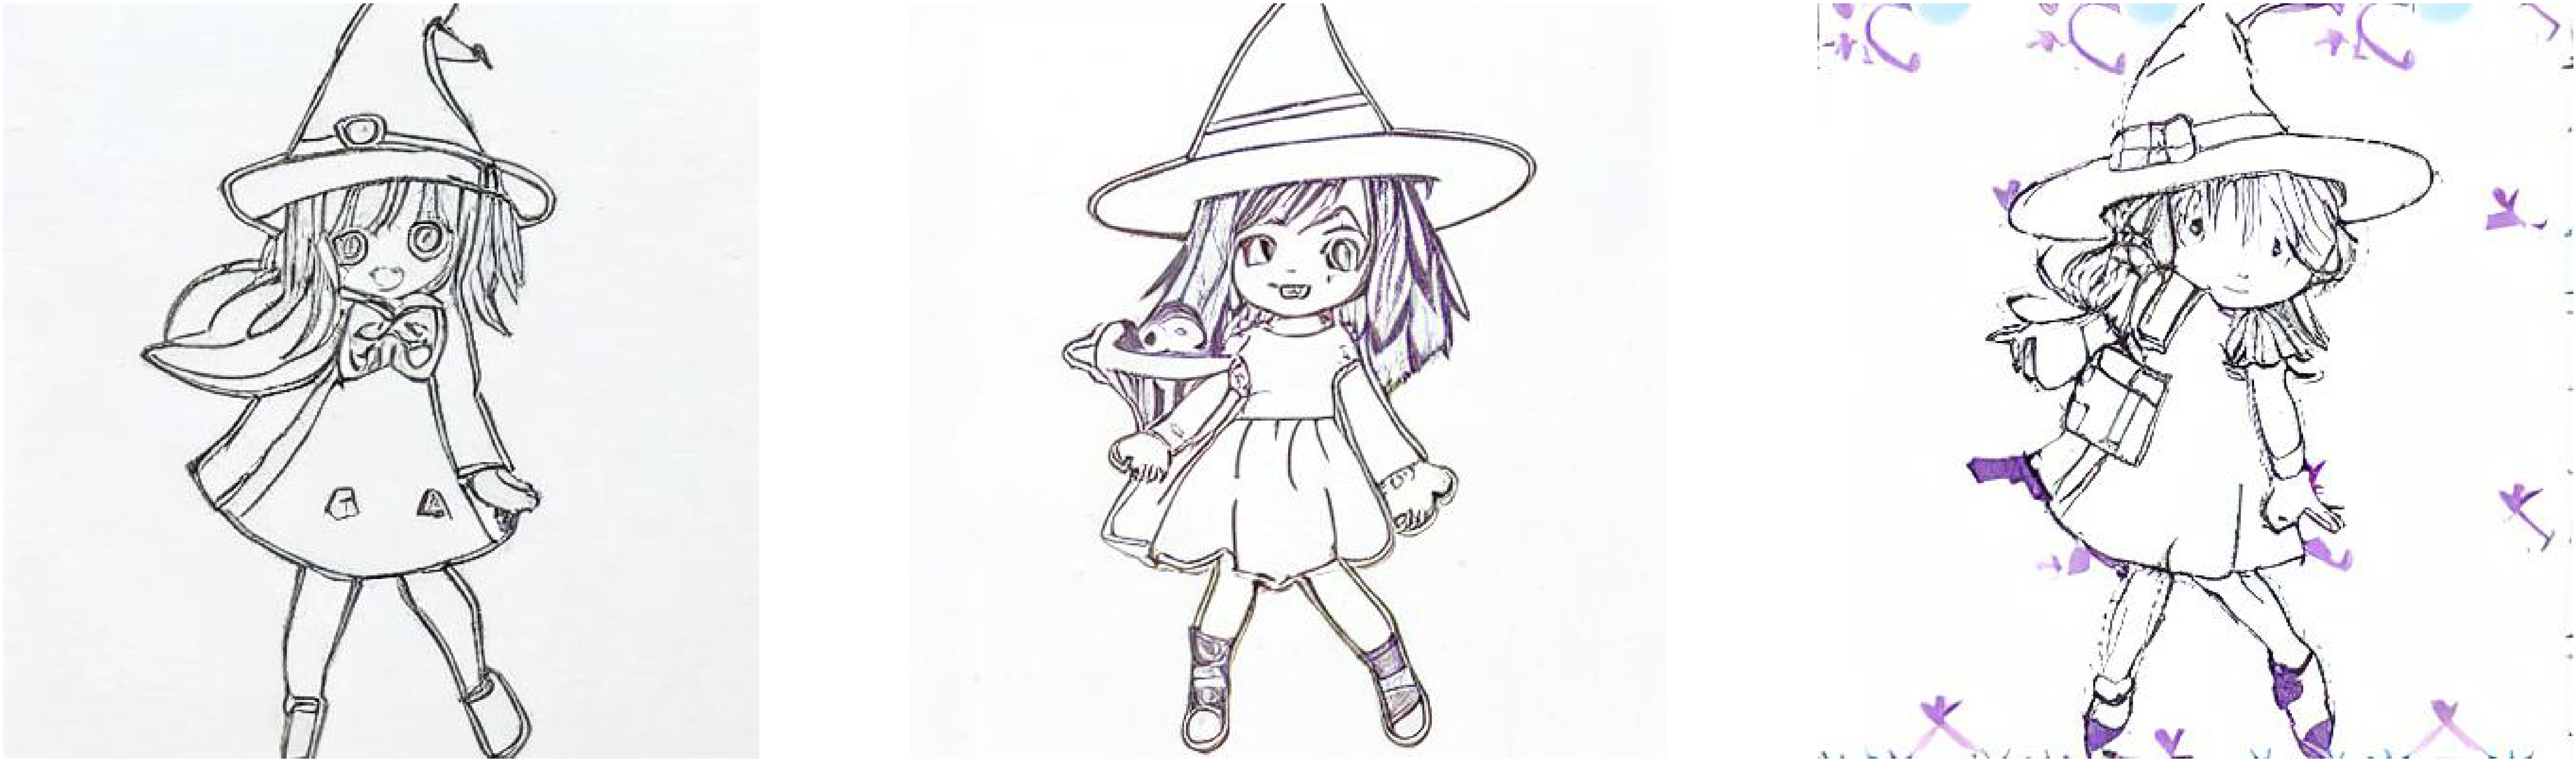

In [ ]:
decoded_images = [decode_base64_image(image) for image in res["generated_images"]]

# visualize generation
display_images(decoded_images)

### Supported Inference parameters

***
This model also supports many advanced parameters while performing inference. They include:

* **inputs**: prompt to guide the image generation. Must be specified and can be a string or a list of strings.
* **strength**: how much base image in use [0,1]
* **width**: width of the hallucinated image. If specified, it must be a positive integer divisible by 8.
* **height**: height of the hallucinated image. If specified, it must be a positive integer divisible by 8.
* **num_inference_steps**: Number of denoising steps during image generation. More steps lead to higher quality image. If specified, it must a positive integer.
* **guidance_scale**: Higher guidance scale results in image closely related to the prompt, at the expense of image quality. If specified, it must be a float. guidance_scale<=1 is ignored.
* **negative_prompt**: guide image generation against this prompt. If specified, it must be a string or a list of strings and used with guidance_scale. If guidance_scale is disabled, this is also disabled. Moreover, if prompt is a list of strings then negative_prompt must also be a list of strings.
* **num_images_per_prompt**: number of images returned per prompt. If specified it must be a positive integer.
* **seed**: Fix the randomized state for reproducibility. If specified, it must be an integer.

***